**dimension** - the number of coordinates we need to specify a point in space.

**Fractal Dimension** is a more precise and general extension of this definition.  **box counting dimension** is one example, which is defined for a set S of points in d-dimensional space.
1. divide the space into a grid with cell size $\varepsilon$
2. count $N\varepsilon$, the number of cells that contain at least one element of S.  as $\varepsilon$ gets smaller, $N\varepsilon$ get's bigger.

$$
N(\varepsilon) \sim (1/\varepsilon)^D
$$
  taking the log of both sides, 
$$
D_{box} = \frac{\log N(\varepsilon)}{\log (1/\varepsilon)}
$$

For CAs, box counting is easy.  Just count the number of "on" cells in each time step and add them up.

Rule 254 is dimension 2, because, with each time step t, the size of the boxes is 1/t, an the number of boxes with any given size is given by $N(\varepsilon)=(1/\varepsilon)^2$ so $D_{box}=2$.

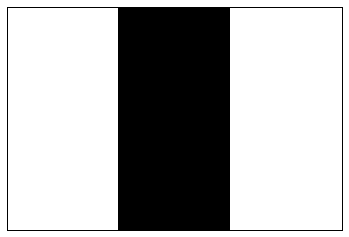

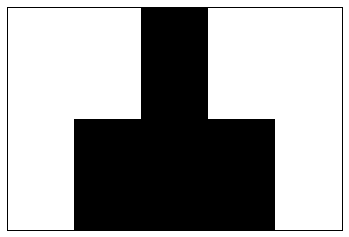

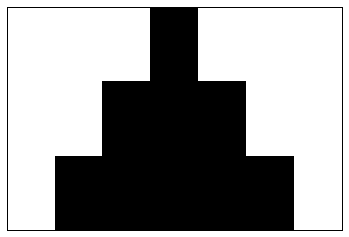

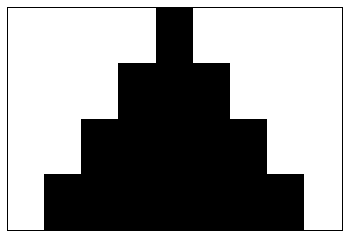

In [73]:
%matplotlib inline
from CA import CA
import CADrawer

for i in xrange(4):
    n=i+1
    rule254 = CA(254, n=n)
    rule254.start_single()
    rule254.loop(n-1)

    drawer = CADrawer.PyplotDrawer()
    drawer.draw(rule254)
    drawer.show()

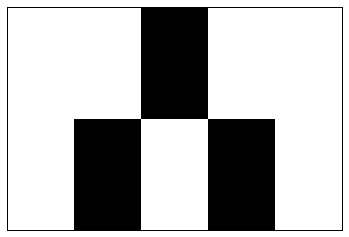

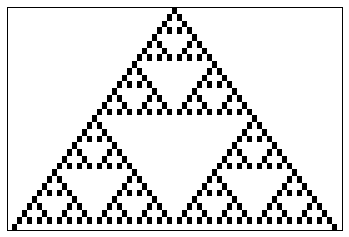

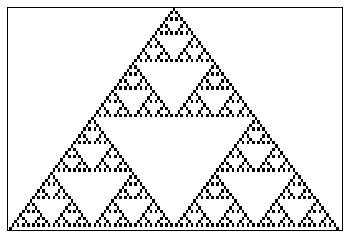

In [75]:
import numpy as np

def draw_rule(rule, n=100):
    ca = CA(rule, n=n)
    ca.start_single()
    ca.loop(n-1)

    plt.figure()
    drawer = CADrawer.PyplotDrawer()
    drawer.draw(ca)
    return ca

for i in np.linspace(1,64,3):
    n=int(i)+1
    draw_rule(18, n=n)

drawer.show()

fractal is a set of points where $D_{box}$ is not an integer.

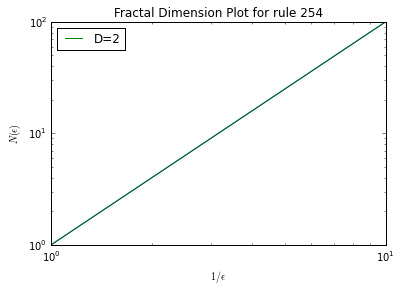

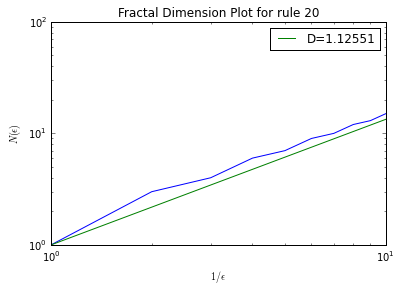

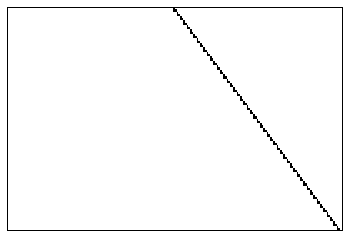

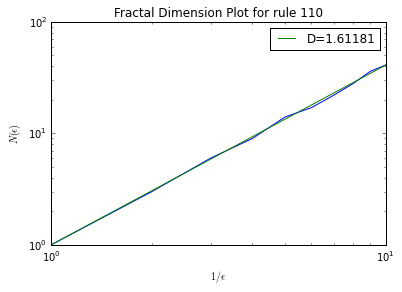

In [76]:
def fit_D(inv_Es, Ns):
    x = np.log10(inv_Es)
    y = np.log10(Ns)
    z = np.polyfit(x, y, 1)
    coef = z[0]
    return coef, np.power(inv_Es, coef)

def fractal_dimension_plot(rule, n=10, points=10, plot=True):
    ca = CA(rule, n=n)
    ca.start_single()
    ca.loop(n-1)
    
    row_sums = []
    for row in ca.array:
        row_sums.append(sum(row))
    Ns = np.cumsum(row_sums)
    inv_Es = np.linspace(1,n, n)
    
    coef, fit_ys = fit_D(inv_Es, Ns)
    
    if plot:
        fig, ax = plt.subplots()
        ax.plot(inv_Es, Ns)
        ax.plot(inv_Es, fit_ys, label='D=%g'%coef)
        ax.set_yscale('log')
        ax.set_ylabel('$N(\epsilon)$')
        ax.set_xscale('log')
        ax.set_xlabel('$1/\epsilon$')
        ax.set_title('Fractal Dimension Plot for rule %s' % rule)
        ax.legend(loc='best')
    return coef

fractal_dimension_plot(254)
fractal_dimension_plot(20)
draw_rule(20)
fractal_dimension_plot(110) 
plt.show()


    
        

##Exercise 8.2 - Forest Fires
1.  An empty cell becomes occupied with probability p
2.  A cell with a tree burns if any of its neighbors is on fire.
3.  A cell with a tree spontaneously burns with probability f, even if none of its neighbors is on fire.
4.  A cell with a burning tree becomes an empty cell in the next time step.

stabilized:
    (p=0.8,f=0.1)
decomposed:
    (p=0.001,f=0.8) - desert


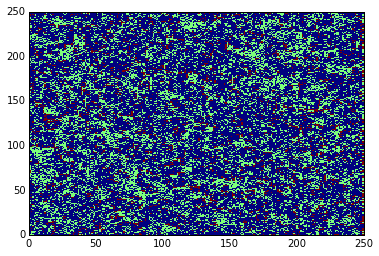

In [83]:
import numpy as np
import Life
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

class ForestFire(Life.Life):
        
    def __init__(self, p, f, n=50, random=True):
        """Attributes:
        p:      tree growth probability
        f:      spontaneous fire probability
        n:      number of rows and columns
        mode:   how border conditions are handled
        array:  the numpy array that contains the data.
        
        tree states:
        0 - empty
        1 - occupied
        2 - on fire
        """
        self.p = p
        self.f = f
        self.n = n
        if random:
            self.array = np.random.random_integers(0, 2, (n, n))
        else:
            self.array = np.zeros((n, n), np.int8)

    def neighbor_on_fire(self, y, x):
        neighbors = [(y+1,x-1), (y+1, x), (y+1,x+1),
                     (y, x-1),            (y, x+1),
                     (y-1,x-1), (y-1, x), (y-1,x+1)]
#         neighbors = [(y+1, x),
#                      (y, x-1),  (y, x+1),
#                      (y-1, x)]
        for n in neighbors:
            if self.array[n] == 2:
                return True
        return False
 

    def step(self):
        a = np.copy(self.array)
        for i in xrange(self.n-1):
            for j in xrange(self.n-1):
                if self.array[j, i] == 0: 
                    if self.p > np.random.random():
                        a[j, i] = 1
                    continue
                elif self.array[j, i] == 1: 
                    if self.neighbor_on_fire(j,i):
                        a[j, i] = 2
                    if self.f > np.random.random():
                        a[j, i] = 2
                    continue
                elif self.array[j, i] == 2:
                    a[j, i] = 0
        self.array = a

class FireViewer(Life.LifeViewer):
    pass
#     def update(self):
#         """Updates the display with the state of the grid."""
#         if self.pcolor:
#             self.pcolor.remove()

#         a = self.life.array > 1
#         self.pcolor = plt.pcolor(a, cmap=self.cmap)
#         self.fig.canvas.draw()


ff = ForestFire(p=1e-1,f=1e-4, n=250, random=True)
for i in xrange(50):
    ff.step()
plt.pcolormesh(ff.array)
# fv = FireViewer(ff)
# fv.animate(steps=1000)


/Users/davidgoldberg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


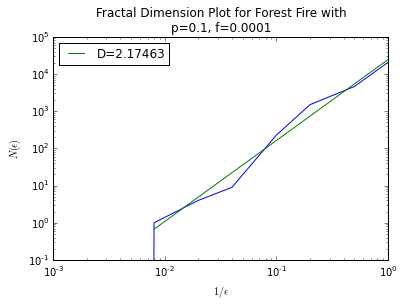

In [110]:
def fit_D2(inv_Es, Ns):
    """optimized to get rid of log0s"""
    inv_Es = inv_Es[:]
    Ns = Ns[:]
    assert len(inv_Es) == len(Ns)
    
    while True:
        try:
            if len(Ns) == 0:
                raise ValueError('could not fit')
            x = np.log10(inv_Es)
            y = np.log10(Ns)
        except:
            inv_Es.pop(0)
            Ns.pop(0)
            continue
        
        if np.all(np.isfinite(x)) and np.all(np.isfinite(y)):
            break
        inv_Es.pop(0)
        Ns.pop(0)
          
    z = np.polyfit(x, y, 1)
    return z, inv_Es, np.power(inv_Es, z[0]) *np.power(10, z[1])

def get_forest_dimension(forest, plot=True):
    from collections import deque
    
    a = forest.array
    height, width = a.shape
    
    #get side_lengths (E = (width/sl)^2):
    side_lengths = deque()
    sl = 1
    while sl <= width:
        if width % sl == 0:
            side_lengths.appendleft(sl)
        sl += 1
    
    inv_Es = [1.0/(s) for s in side_lengths]
    
    def box_is_on(array):
        """to start, simply getting sum of live trees"""
        if np.sum(array>=1) > np.prod(array.shape)/2:
            return True
        return False
    
    Ns = []
    for sl in side_lengths:
        N = 0
        for row in xrange(height):
            for col in xrange(width):
                if col % width == 0: continue
                if col % sl != 0: continue
                N += box_is_on(a[row:row+sl, col:col+sl])
        Ns.append(N)
    
    z, fit_xs, fit_ys = fit_D2(inv_Es, Ns)
    
    if plot:
        fig, ax = plt.subplots()
        ax.plot(inv_Es, Ns)
        ax.plot(fit_xs, fit_ys, label='D=%g'%z[0])
        ax.set_yscale('log')
        ax.set_ylabel('$N(\epsilon)$')
        ax.set_xscale('log')
        ax.set_xlabel('$1/\epsilon$')
        ax.set_title('Fractal Dimension Plot for Forest Fire with \n'+
                     'p=%g, f=%g' % (forest.p, forest.f))
        ax.legend(loc='best')
    return z[0]

get_forest_dimension(ff)
plt.show()

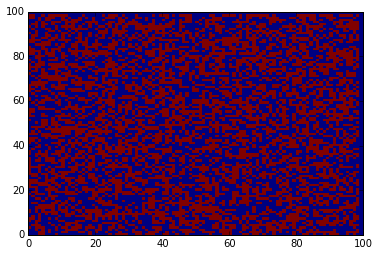

In [119]:
ff2 = ForestFire(p=0.5,f=0, n=100, random=False)
for i in xrange(1):
    ff2.step()
plt.pcolormesh(ff2.array)


/Users/davidgoldberg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


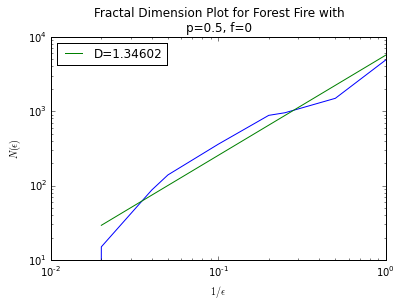

In [120]:
get_forest_dimension(ff2)
plt.show()

##Percolation
**Bond percolation** - each site is connected to 4 neighbors by a bond.  Each bond is porous or non-porous.  Set of connected sites is called a cluster.  Graphs: site is vertex, bond is edge, and cluster is connected subgraph.

**Site Percolation** - grid of cells where each is eigher porous or non-porous. If porous cells are adjacent, they are considered connected.  Connected cells make up a cluster.

**spanning cluster** e.g. cluster reaches top and bottom row of a grid.

##Exercise 8.3
[the link](http://journals.aps.org/prl/pdf/10.1103/PhysRevLett.85.4104)
1.  "microcanonical ensemble" and "canonical ensemble":  "Micro..." refers to systems with N nodes and a fixed number n occupied cells.  "Canonical" refers to the distribution for all permutations of n.  What this paper is suggesting is that, if you can find the value of an observable for all values of n, you can sum these up to get the distribution of that observable for all p.  The microcanonical ensemble is the one that they use a Monte Carlo simulation to represent.

2.  algorithm used to merge two clusters efficiently.
    First of all, here is bond percolation algorithm.
    1.  start with lattice in which no bonds are occupied.  Every site is a separate cluster.  Each cluster is given a unique label
    2.  Add random bond
        * connects two sites which are already in same cluster--do nothing
        * connects two sites in different clusters.  change label of one to label off root node in other.  Tree structure where all nodes point to either "root node" or to some other node in the structure.
            * smaller cluster is subtree of the latter
            * pointers of all nodes along the path changed to point directly to root node.
3.  Reason their algorithm is faster than simpler alternatives:  only checks every cell one time

In [1]:
from Graph import *

def reverse_tuple(tup):
    return tup[::-1]

class ConnectivityError(Exception):
    """when graph is total connected"""

class BondPercolationArray(Graph):
    
    def __init__(self, N=20):
        from collections import defaultdict
        from math import sqrt
        self.N = int(sqrt(N))
        if self.N != sqrt(N): print "CAUTION: Number of Cells is not Square"
        self.clusters = {}
        self.open_edges = set()
        self.vlabels = {}
        
        #make vertices
        for n1 in range(self.N):
            for n2 in range(self.N):
                pos = (n1,n2)
                v = Vertex(pos)
                v.root = v.label
                self.add_vertex(v)
                self.clusters[v.root] = set([v])
        
        #make edges
        for v in self.vertices():
            neighbors = self.get_neighbors_pos(v)
            for npos in neighbors:
                n = self.get_vertex(npos)
                e = Edge(v, n)
                e.state = 0 #closed
                self.add_edge(e)
    
    def add_vertex(self, v):
        Graph.add_vertex(self, v)
        self.vlabels[v.label] = v
    
    def add_edge(self, e):
        Graph.add_edge(self, e)
        if reverse_tuple(e) in self.open_edges: return
        self.open_edges.add(e)
        
    def get_vertex(self, pos):
        return self.vlabels.get(pos)
    
    def get_neighbors_pos(self, v):
        row, col = v.label
        return     [((row+1)%self.N,  col          ),
                     (row,            (col+1)%self.N),
                     ((row-1)%self.N,  col          ),
                     (row,            (col-1)%self.N)]
    
    def step(self, debug=True):
        from random import choice
        edges = self.open_edges
        
        #1. open random edge
        try:
            e = choice(tuple(edges))
        except IndexError:
            raise ConnectivityError('completely connected')
        e.state = 1
        
        self.open_edges.discard(e)
        self.open_edges.discard(reverse_tuple(e))
        
        #2. merge clusters - smaller to bigger
        if e[0].root == e[1].root: return
        cluster0 = self.clusters[e[0].root]
        cluster1 = self.clusters[e[1].root]
        if len(cluster1)>=len(cluster0):
            to_remove = e[0].root
            for v in cluster0:
                v.root = e[1].root
            self.clusters[e[1].root].update(cluster0)
        else:
            to_remove = e[1].root
            for v in cluster1:
                v.root = e[0].root
            self.clusters[e[0].root].update(cluster1)
            
        del self.clusters[to_remove]
    
    def loop(self, steps=None):
        """
        used in complexity analysis below
        """
        i = 0
        while True:
            try:
                self.step()
                i += 1
            except ConnectivityError:
                break
            if steps >= i and (steps is not None):
                break
    
    def v_percolates(self, debug=False):
        top = set([v for v in self.vertices() if v.label[0] == 0])
        bottom = set([v for v in self.vertices() if v.label[0] == self.N-1])
        
            
        for root, cluster in self.clusters.iteritems():
            if debug: print cluster;print 
            if (not top.isdisjoint(cluster)) and (not bottom.isdisjoint(cluster)):   
                return True
        return False
    
    def test_v_percolates(self, stop=None, debug=False):
        i = 1
        while not self.v_percolates(debug=debug):
            if i >= stop and (stop is not None):
                return False
            self.step()
            i += 1
            if debug:
                if i>1000: raise OverflowError('too many iterations of loop')
        return i

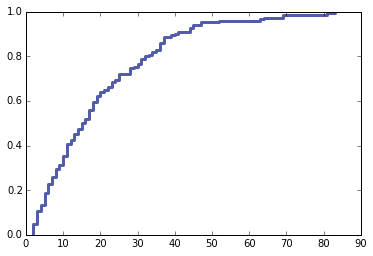

In [18]:
import thinkstats, thinkplot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def microcanonical_ensemble(N=100, num_trials=150, verbose=False, plot=False):
    """returns """
    percs = []
    for i in xrange(num_trials):
        if verbose:
            if i % 100 == 0: print i, 'of', num_trials
        bpa = BondPercolationArray(N=N)
        percs.append(bpa.test_v_percolates())
    cdf = thinkstats.Cdf(percs)
    if plot:
        thinkplot.Cdf(cdf)
#         thinkplot.Config(title='Microcanonical Ensemble for N %d'%N)
                         
    return cdf
# microcanonical_ensemble(plot=True)

def micro2(N=49, num_trials=100):
    results = []
    for n in xrange(N):
        successes = 0.0
        for trial in xrange(num_trials):
            bpa = BondPercolationArray(N=N)
            bpa.loop(steps=n)
            if bpa.v_percolates(): successes += 1.0
        results.append(successes/num_trials)
    return results
# res = micro2()
# plt.plot(range(49), res)
# plt.show()
    

def canonical_ensemble(p, N, verbose=False):
    mce =  microcanonical_ensemble(N)
    from scipy.special import binom
    result = sum(binom(N, n)*(p**n)*(1-p)**(N-n)*mce.Prob(n) for n in xrange(N))
    return result

def plot_canonicals():
    from collections import defaultdict
    Ns = [64,100]
    ps = np.linspace(0.0,.9, 10)
    results = defaultdict(list)
    for N in Ns:
        print N
        for i, p in enumerate(ps):
            results[N].append(canonical_ensemble(p=p, N=N))
        canon = [c/results[N][-1] for c in results[N]]
        plt.plot(ps, canon, label='N=%d'%N)
    plt.legend(loc='best')
    plt.show()
    return results
# res = plot_canonicals()
# for key, val in res.iteritems():
#     print 'N=',key,', mean=', np.mean(val)

In [ ]:
4+9

In [ ]:
# import os

def etime():
    """See how much user and system time this process has used
    so far and return the sum"""
    user, sys, chuser, chsys, real = os.times()
    return user+sys

def time_bpa(plot=False):
    Ns = np.logspace(2,4,10).astype(np.int)
    times = []
    
    for N in Ns:
        start = etime()
        bpa = BondPercolationArray(N)
        bpa.loop()
        end = etime()
        elapsed = end - start
        times.append(elapsed)
    if plot:
        fig, ax = plt.subplots()
        ax.plot(Ns, times)
        ax.set_xscale('log')
        ax.set_yscale('log')
    return Ns, times

def time_bpa2():
    n = 250
    Ns = range(n)
    times = []
    bpa = BondPercolationArray(n)
    
    for i in Ns:
        start = etime()
        
        bpa.step()
        
        end = etime()
        elapsed = end - start
        times.append(elapsed)
    return Ns, times

def time_bpa3(plot=False):
    Ns = np.logspace(2,4,10).astype(np.int)
    times = []
    
    for N in Ns:
        
        bpa = BondPercolationArray(N)
        start = etime()
        bpa.loop()
        end = etime()
        elapsed = end - start
        times.append(elapsed)
    if plot:
        fig, ax = plt.subplots()
        ax.plot(Ns, times)
        ax.set_xscale('log')
        ax.set_yscale('log')
    return Ns, times

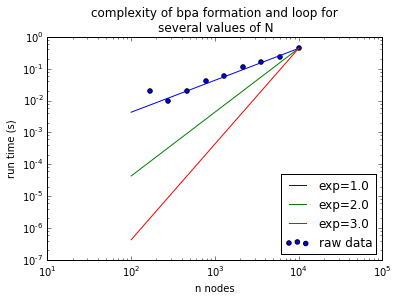

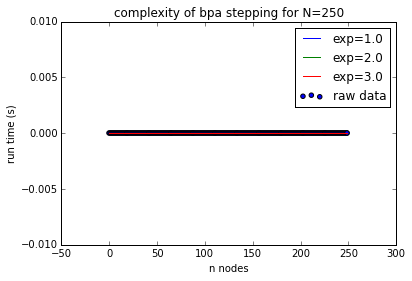

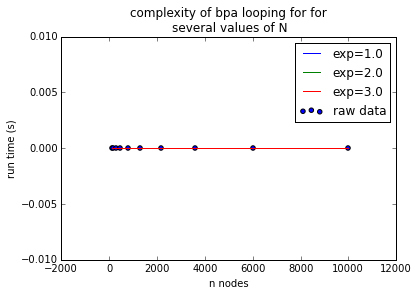

In [336]:
def fit(ns, ts, exp=1.0, index=-1):
    """Fits a curve with the given exponent.

    Use the given index as a reference point, and scale all other
    points accordingly.
    """
    nref = ns[index]
    tref = ts[index]

    tfit = []
    for n in ns:
        ratio = float(n) / nref
        t = ratio**exp * tref
        tfit.append(t)

    return tfit

def fit_complexity(ns, times, title='', ax=None, log=True):
    t_fit1 = fit(ns, times, exp=1.0)
    t_fit2 = fit(ns, times, exp=2.0)
    t_fit3 = fit(ns, times, exp=3.0)

    if ax is None:
        fig, ax = plt.subplots()
    ax.scatter(ns, times, label="raw data")
    ax.plot(ns, t_fit1, label='exp=1.0')
    ax.plot(ns, t_fit2, label='exp=2.0')
    ax.plot(ns, t_fit3, label='exp=3.0')
    if log:
        ax.set_xscale('log')
        ax.set_yscale('log')
    ax.set_xlabel('n nodes')
    ax.set_ylabel('run time (s)')
    ax.set_title(title)
    plt.legend(loc='best')
#     plt.show()
    
ns, times = time_bpa()
fit_complexity(ns, times, title='complexity of bpa formation and loop for\n'+
                                 'several values of N')
ns, times = time_bpa2()
fit_complexity(ns, times, title='complexity of bpa stepping for N=250', log=False)

ns, times = time_bpa3()
fit_complexity(ns, times, title='complexity of bpa looping for for\n'+
                                 'several values of N', log=False)
plt.show()

In [410]:
from math import sqrt
sqrt(49.1) == 7

False

In [421]:
if None or True:
    print "true"

true


In [386]:
set([6]).isdisjoint(set([6,9]))

False

In [457]:
np.linspace(.3,.8, 6)

array([ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8])